In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
wine_data = pd.read_csv(r"C:\Users\USER\Desktop\ICT DATASCIENCE\wine_clust.csv")

# Explore the dataset
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [27]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


# Pre processing

In [28]:
# Check for missing values
print(wine_data.isnull().sum())

# Standardize the features
scaler = StandardScaler()
wine_data_scaled = scaler.fit_transform(wine_data)

# Convert to DataFrame
wine_data_scaled = pd.DataFrame(wine_data_scaled, columns=wine_data.columns)

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


# KMean clustering

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

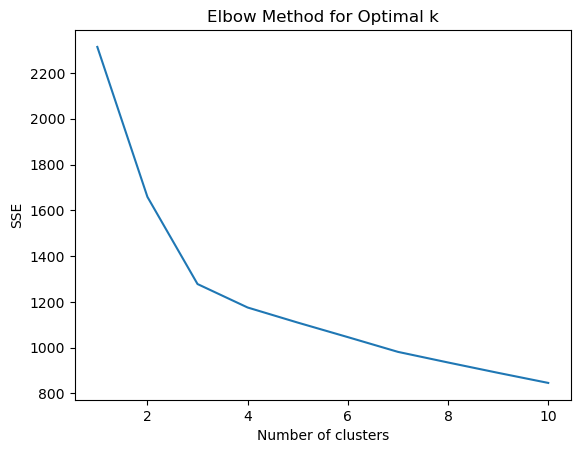

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
# Find the optimal number of clusters using the Elbow method
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(wine_data_scaled)
    sse[k] = kmeans.inertia_

# Plot the Elbow method
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal k")
plt.show()


# Fit K-Means with the optimal number of clusters
k_optimal = 3 # insert optimal number of clusters here
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(wine_data_scaled)

# Add cluster labels to the original dataset
wine_data["cluster_labels_kmeans"] = kmeans.labels_

# Agglomerative Clustering

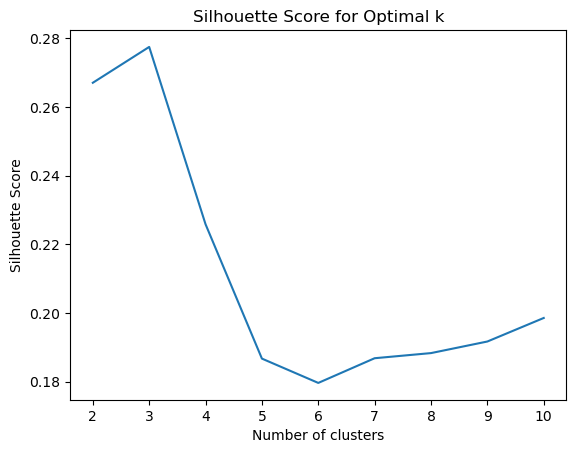

In [30]:
# Find the optimal number of clusters using the silhouette score
silhouette_scores = []
for k in range(2, 11):
    agg_clustering = AgglomerativeClustering(n_clusters=k)
    cluster_labels = agg_clustering.fit_predict(wine_data_scaled)
    silhouette_scores.append(silhouette_score(wine_data_scaled, cluster_labels))

# Plot silhouette scores
plt.figure()
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()


# Fit Agglomerative Clustering with the optimal number of clusters
k_optimal_agg = 4  # insert optimal number of clusters here
agg_clustering = AgglomerativeClustering(n_clusters=k_optimal_agg)
agg_clustering.fit(wine_data_scaled)

# Add cluster labels to the original dataset
wine_data["cluster_labels_agg"] = agg_clustering.labels_

# PCA (Principal Component Analysis)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

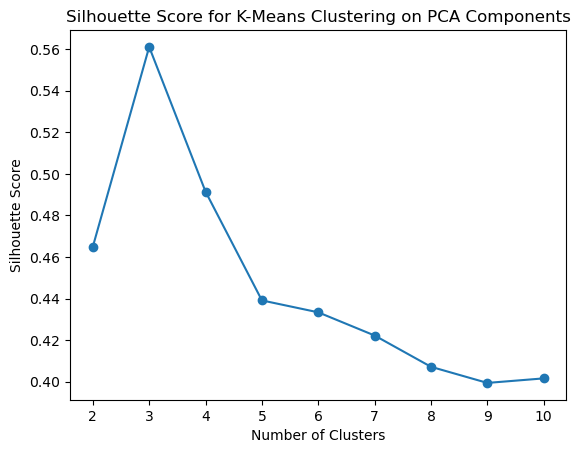

Optimal number of clusters: 3


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [31]:
# Create a range of clusters to try
cluster_range = range(2, 11)

# List to store silhouette scores for each cluster
silhouette_scores = []
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_data_scaled)

# Fit K-Means for each cluster and compute silhouette score
for num_clusters in cluster_range:
    kmeans_pca = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_pca.fit(wine_pca)
    cluster_labels = kmeans_pca.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(wine_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for different number of clusters
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means Clustering on PCA Components')
plt.show()

# Determine the optimal number of clusters based on the silhouette score
optimal_num_clusters = cluster_range[np.argmax(silhouette_scores)]
print("Optimal number of clusters:", optimal_num_clusters)

# Fit K-Means with the optimal number of clusters
kmeans_pca_optimal = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans_pca_optimal.fit(wine_pca)

# Add cluster labels to the original dataset
wine_data["cluster_labels_kmeans_pca"] = kmeans_pca_optimal.labels_


# DBSCAN Clustering

In [32]:
# Determine the optimal parameters for DBSCAN
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_values = [5, 10, 15, 20]

best_score = -1
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(wine_data_scaled)
        if len(np.unique(cluster_labels)) > 1:  # Exclude cases with only noise
            silhouette_avg = silhouette_score(wine_data_scaled, cluster_labels)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

print("Best Silhouette Score:", best_score)
print("Best eps:", best_eps)
print("Best min_samples:", best_min_samples)

# Fit DBSCAN with the optimal parameters
if best_eps is not None:  # Check if best_eps is not None before fitting DBSCAN
    dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    dbscan.fit(wine_data_scaled)

    # Add cluster labels to the original dataset
    wine_data["cluster_labels_dbscan"] = dbscan.labels_
else:
    print("Error: Unable to determine the best epsilon value.")


Best Silhouette Score: -1
Best eps: None
Best min_samples: None
Error: Unable to determine the best epsilon value.
